In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.datasets import make_regression
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.robust.robust_linear_model as rlm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel 
import joblib
import datetime

In [2]:
d1=pd.read_csv(r"/Users/vishal69/Downloads/archive (1)/ChargingBundles.csv")

In [3]:
d2=pd.read_csv(r"/Users/vishal69/Downloads/archive (1)/SyntheticTripsCanaryWharf.csv")

In [4]:
d3=pd.read_csv(r"/Users/vishal69/Downloads/archive (1)/SyntheticTripsWestfield.csv")

# Understanding the data

In [5]:
d1

,Unnamed: 0,Charging_Rate,Charging_FirstHour,Charging_SecondHour,Charging_ThirdHour,Charging_FourthHour,Parking
0,0,6,1,0,0,0,1
1,1,6,1,0,0,0,2
2,2,6,0,1,0,0,1
3,3,6,0,1,0,0,2
4,4,6,0,0,1,0,1
5,5,6,0,0,1,0,2
6,6,6,0,0,0,1,1
7,7,6,0,0,0,1,2
8,8,3,1,1,0,0,1
9,9,3,1,1,0,0,2


In [6]:
d2

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,0.0,1.0,1.0,1.0,0.0,9.0,14.0,805.077015,327.698032,2.0,19.470142,3.894028,1.0,3.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,9.0,12.0,316.180328,778.154869,1.0,0.614376,0.204792,1.0,4.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,18.0,21.0,579.765470,1014.030078,1.0,10.198743,3.399581,1.0,4.0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,9.0,11.0,385.647507,667.722248,1.0,6.038539,3.019269,1.0,7.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,927.936420,1405.832494,1.0,2.077417,0.230824,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2708,1.0,1.0,1.0,1.0,1.0,0.0,16.0,21.0,645.697298,1116.176509,1.0,5.343688,1.068738,1.0,1.0
2709,2709,1.0,0.0,1.0,1.0,1.0,0.0,13.0,21.0,1095.303611,641.056160,2.0,1.720035,0.215004,0.0,6.0
2710,2710,1.0,0.0,1.0,1.0,1.0,0.0,12.0,13.0,774.661216,864.826572,1.0,0.348772,0.348772,1.0,6.0
2711,2711,0.0,0.0,1.0,1.0,1.0,1.0,9.0,12.0,1122.657561,1572.057569,1.0,8.984400,2.994800,1.0,2.0


In [7]:
d3

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,21.0,589.618521,663.049018,1.0,14.803792,4.934597,0.0,2.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,17.0,20.0,80.752709,805.014907,1.0,4.573522,1.524507,1.0,7.0
2,2,1.0,0.0,1.0,1.0,1.0,0.0,13.0,14.0,562.737950,1275.947491,1.0,3.360450,3.360450,1.0,3.0
3,3,1.0,0.0,1.0,1.0,1.0,0.0,9.0,10.0,951.273883,1655.966787,1.0,3.499822,3.499822,1.0,5.0
4,4,0.0,0.0,1.0,0.0,1.0,1.0,15.0,16.0,1030.487749,1752.226298,1.0,1.379617,1.379617,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,0.0,1.0,0.0,0.0,0.0,0.0,13.0,19.0,864.307816,146.669697,2.0,10.483489,1.747248,0.0,6.0
3586,3586,1.0,0.0,1.0,1.0,1.0,1.0,19.0,20.0,1067.082940,1313.475542,1.0,9.326714,9.326714,1.0,2.0
3587,3587,0.0,0.0,1.0,1.0,1.0,0.0,18.0,20.0,389.960254,507.252403,1.0,1.701807,0.850903,0.0,6.0
3588,3588,0.0,0.0,1.0,0.0,1.0,0.0,13.0,14.0,1146.659932,548.613707,2.0,1.275107,1.275107,0.0,3.0


In [8]:
df = d3.merge(d2, on='Unnamed: 0')

In [9]:
df

,Unnamed: 0,Dummy_Age_x,Dummy_Gender_x,Dummy_EmploymentStatus_x,Dummy_MaritalStatus_x,Dummy_Children_x,Dummy_Income_x,Parking_Start_time_x,Parking_End_time_x,WalkingDistance_Parking1_x,...,Dummy_Income_y,Parking_Start_time_y,Parking_End_time_y,WalkingDistance_Parking1_y,WalkingDistance_Parking2_y,ParkingLocation_y,Energy_Required_y,Charging_Rate_y,Dummy_WorkBasedTour_y,Weekday_y
0,0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,21.0,589.618521,...,0.0,9.0,14.0,805.077015,327.698032,2.0,19.470142,3.894028,1.0,3.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,17.0,20.0,80.752709,...,0.0,9.0,12.0,316.180328,778.154869,1.0,0.614376,0.204792,1.0,4.0
2,2,1.0,0.0,1.0,1.0,1.0,0.0,13.0,14.0,562.737950,...,0.0,18.0,21.0,579.765470,1014.030078,1.0,10.198743,3.399581,1.0,4.0
3,3,1.0,0.0,1.0,1.0,1.0,0.0,9.0,10.0,951.273883,...,0.0,9.0,11.0,385.647507,667.722248,1.0,6.038539,3.019269,1.0,7.0
4,4,0.0,0.0,1.0,0.0,1.0,1.0,15.0,16.0,1030.487749,...,0.0,12.0,21.0,927.936420,1405.832494,1.0,2.077417,0.230824,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2708,1.0,0.0,1.0,1.0,1.0,0.0,17.0,19.0,749.605229,...,0.0,16.0,21.0,645.697298,1116.176509,1.0,5.343688,1.068738,1.0,1.0
2709,2709,0.0,0.0,1.0,1.0,0.0,0.0,16.0,21.0,730.482717,...,0.0,13.0,21.0,1095.303611,641.056160,2.0,1.720035,0.215004,0.0,6.0
2710,2710,0.0,0.0,1.0,1.0,1.0,1.0,14.0,18.0,995.670628,...,0.0,12.0,13.0,774.661216,864.826572,1.0,0.348772,0.348772,1.0,6.0
2711,2711,0.0,1.0,0.0,1.0,1.0,0.0,12.0,14.0,912.375471,...,1.0,9.0,12.0,1122.657561,1572.057569,1.0,8.984400,2.994800,1.0,2.0


In [10]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           60 non-null     int64
 1   Charging_Rate        60 non-null     int64
 2   Charging_FirstHour   60 non-null     int64
 3   Charging_SecondHour  60 non-null     int64
 4   Charging_ThirdHour   60 non-null     int64
 5   Charging_FourthHour  60 non-null     int64
 6   Parking              60 non-null     int64
dtypes: int64(7)
memory usage: 3.4 KB


In [11]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2713 non-null   int64  
 1   Dummy_Age                 2713 non-null   float64
 2   Dummy_Gender              2713 non-null   float64
 3   Dummy_EmploymentStatus    2713 non-null   float64
 4   Dummy_MaritalStatus       2713 non-null   float64
 5   Dummy_Children            2713 non-null   float64
 6   Dummy_Income              2713 non-null   float64
 7   Parking_Start_time        2713 non-null   float64
 8   Parking_End_time          2713 non-null   float64
 9   WalkingDistance_Parking1  2713 non-null   float64
 10  WalkingDistance_Parking2  2713 non-null   float64
 11  ParkingLocation           2713 non-null   float64
 12  Energy_Required           2713 non-null   float64
 13  Charging_Rate             2713 non-null   float64
 14  Dummy_Wo

In [12]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3590 non-null   int64  
 1   Dummy_Age                 3590 non-null   float64
 2   Dummy_Gender              3590 non-null   float64
 3   Dummy_EmploymentStatus    3590 non-null   float64
 4   Dummy_MaritalStatus       3590 non-null   float64
 5   Dummy_Children            3590 non-null   float64
 6   Dummy_Income              3590 non-null   float64
 7   Parking_Start_time        3590 non-null   float64
 8   Parking_End_time          3590 non-null   float64
 9   WalkingDistance_Parking1  3590 non-null   float64
 10  WalkingDistance_Parking2  3590 non-null   float64
 11  ParkingLocation           3590 non-null   float64
 12  Energy_Required           3590 non-null   float64
 13  Charging_Rate             3590 non-null   float64
 14  Dummy_Wo

In [13]:
d1.head()

,Unnamed: 0,Charging_Rate,Charging_FirstHour,Charging_SecondHour,Charging_ThirdHour,Charging_FourthHour,Parking
0,0,6,1,0,0,0,1
1,1,6,1,0,0,0,2
2,2,6,0,1,0,0,1
3,3,6,0,1,0,0,2
4,4,6,0,0,1,0,1


In [14]:
d2.head()

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,0.0,1.0,1.0,1.0,0.0,9.0,14.0,805.077015,327.698032,2.0,19.470142,3.894028,1.0,3.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,9.0,12.0,316.180328,778.154869,1.0,0.614376,0.204792,1.0,4.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,18.0,21.0,579.765470,1014.030078,1.0,10.198743,3.399581,1.0,4.0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,9.0,11.0,385.647507,667.722248,1.0,6.038539,3.019269,1.0,7.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,927.936420,1405.832494,1.0,2.077417,0.230824,1.0,4.0


In [15]:
d3.head()

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,21.0,589.618521,663.049018,1.0,14.803792,4.934597,0.0,2.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,17.0,20.0,80.752709,805.014907,1.0,4.573522,1.524507,1.0,7.0
2,2,1.0,0.0,1.0,1.0,1.0,0.0,13.0,14.0,562.737950,1275.947491,1.0,3.360450,3.360450,1.0,3.0
3,3,1.0,0.0,1.0,1.0,1.0,0.0,9.0,10.0,951.273883,1655.966787,1.0,3.499822,3.499822,1.0,5.0
4,4,0.0,0.0,1.0,0.0,1.0,1.0,15.0,16.0,1030.487749,1752.226298,1.0,1.379617,1.379617,0.0,2.0


In [16]:
d1.dropna(inplace=True)

In [17]:
d2.dropna(inplace=True)

In [18]:
d3.dropna(inplace=True)

In [19]:
d1.drop_duplicates(inplace=True)

In [20]:
d2.drop_duplicates(inplace=True)

In [21]:
d3.drop_duplicates(inplace=True)

In [22]:
d1

,Unnamed: 0,Charging_Rate,Charging_FirstHour,Charging_SecondHour,Charging_ThirdHour,Charging_FourthHour,Parking
0,0,6,1,0,0,0,1
1,1,6,1,0,0,0,2
2,2,6,0,1,0,0,1
3,3,6,0,1,0,0,2
4,4,6,0,0,1,0,1
5,5,6,0,0,1,0,2
6,6,6,0,0,0,1,1
7,7,6,0,0,0,1,2
8,8,3,1,1,0,0,1
9,9,3,1,1,0,0,2


In [23]:
d2

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,0.0,1.0,1.0,1.0,0.0,9.0,14.0,805.077015,327.698032,2.0,19.470142,3.894028,1.0,3.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,9.0,12.0,316.180328,778.154869,1.0,0.614376,0.204792,1.0,4.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,18.0,21.0,579.765470,1014.030078,1.0,10.198743,3.399581,1.0,4.0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,9.0,11.0,385.647507,667.722248,1.0,6.038539,3.019269,1.0,7.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,927.936420,1405.832494,1.0,2.077417,0.230824,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2708,1.0,1.0,1.0,1.0,1.0,0.0,16.0,21.0,645.697298,1116.176509,1.0,5.343688,1.068738,1.0,1.0
2709,2709,1.0,0.0,1.0,1.0,1.0,0.0,13.0,21.0,1095.303611,641.056160,2.0,1.720035,0.215004,0.0,6.0
2710,2710,1.0,0.0,1.0,1.0,1.0,0.0,12.0,13.0,774.661216,864.826572,1.0,0.348772,0.348772,1.0,6.0
2711,2711,0.0,0.0,1.0,1.0,1.0,1.0,9.0,12.0,1122.657561,1572.057569,1.0,8.984400,2.994800,1.0,2.0


In [24]:
d3

,Unnamed: 0,Dummy_Age,Dummy_Gender,Dummy_EmploymentStatus,Dummy_MaritalStatus,Dummy_Children,Dummy_Income,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required,Charging_Rate,Dummy_WorkBasedTour,Weekday
0,0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,21.0,589.618521,663.049018,1.0,14.803792,4.934597,0.0,2.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,17.0,20.0,80.752709,805.014907,1.0,4.573522,1.524507,1.0,7.0
2,2,1.0,0.0,1.0,1.0,1.0,0.0,13.0,14.0,562.737950,1275.947491,1.0,3.360450,3.360450,1.0,3.0
3,3,1.0,0.0,1.0,1.0,1.0,0.0,9.0,10.0,951.273883,1655.966787,1.0,3.499822,3.499822,1.0,5.0
4,4,0.0,0.0,1.0,0.0,1.0,1.0,15.0,16.0,1030.487749,1752.226298,1.0,1.379617,1.379617,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,3585,0.0,1.0,0.0,0.0,0.0,0.0,13.0,19.0,864.307816,146.669697,2.0,10.483489,1.747248,0.0,6.0
3586,3586,1.0,0.0,1.0,1.0,1.0,1.0,19.0,20.0,1067.082940,1313.475542,1.0,9.326714,9.326714,1.0,2.0
3587,3587,0.0,0.0,1.0,1.0,1.0,0.0,18.0,20.0,389.960254,507.252403,1.0,1.701807,0.850903,0.0,6.0
3588,3588,0.0,0.0,1.0,0.0,1.0,0.0,13.0,14.0,1146.659932,548.613707,2.0,1.275107,1.275107,0.0,3.0


In [25]:
d1.isna().sum()

Unnamed: 0             0
Charging_Rate          0
Charging_FirstHour     0
Charging_SecondHour    0
Charging_ThirdHour     0
Charging_FourthHour    0
Parking                0
dtype: int64

In [26]:
d2.isna().sum()

Unnamed: 0                  0
Dummy_Age                   0
Dummy_Gender                0
Dummy_EmploymentStatus      0
Dummy_MaritalStatus         0
Dummy_Children              0
Dummy_Income                0
Parking_Start_time          0
Parking_End_time            0
WalkingDistance_Parking1    0
WalkingDistance_Parking2    0
ParkingLocation             0
Energy_Required             0
Charging_Rate               0
Dummy_WorkBasedTour         0
Weekday                     0
dtype: int64

In [27]:
d3.isna().sum()

Unnamed: 0                  0
Dummy_Age                   0
Dummy_Gender                0
Dummy_EmploymentStatus      0
Dummy_MaritalStatus         0
Dummy_Children              0
Dummy_Income                0
Parking_Start_time          0
Parking_End_time            0
WalkingDistance_Parking1    0
WalkingDistance_Parking2    0
ParkingLocation             0
Energy_Required             0
Charging_Rate               0
Dummy_WorkBasedTour         0
Weekday                     0
dtype: int64

In [28]:
d1=d1.drop('Unnamed: 0',axis=1)

# EDA comparison of both the locations datasets

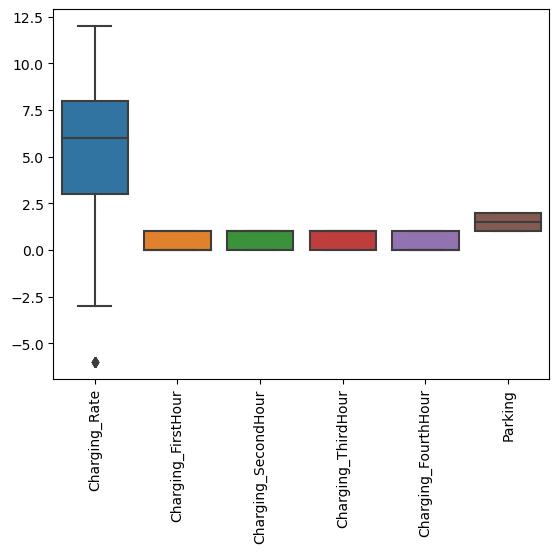

In [29]:
sns.boxplot(data=d1)
plt.xticks(rotation=90)
plt.show()

In [30]:
d2=d2.drop('Unnamed: 0',axis=1)

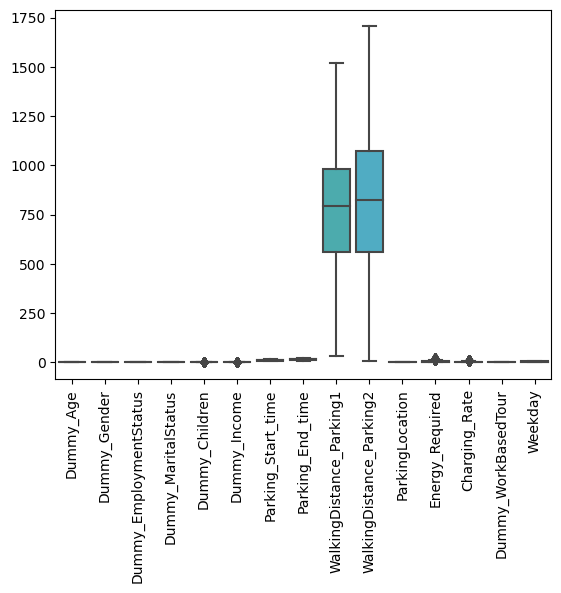

In [31]:
sns.boxplot(data=d2)
plt.xticks(rotation=90)
plt.show()

In [32]:
d3=d3.drop('Unnamed: 0',axis=1)

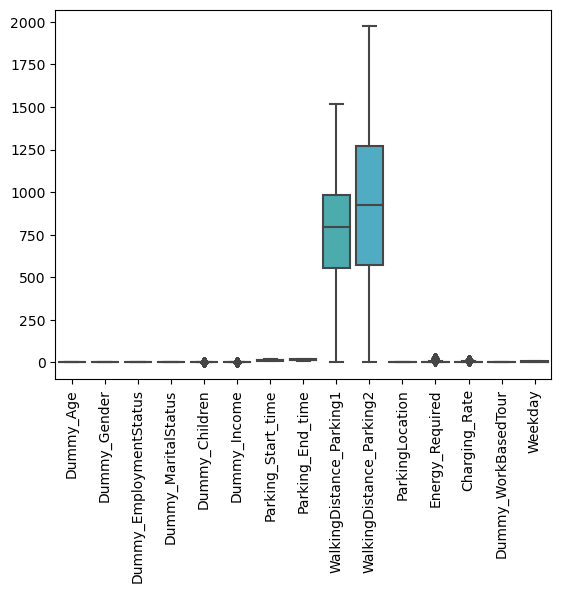

In [33]:
sns.boxplot(data=d3)
plt.xticks(rotation=90)
plt.show()

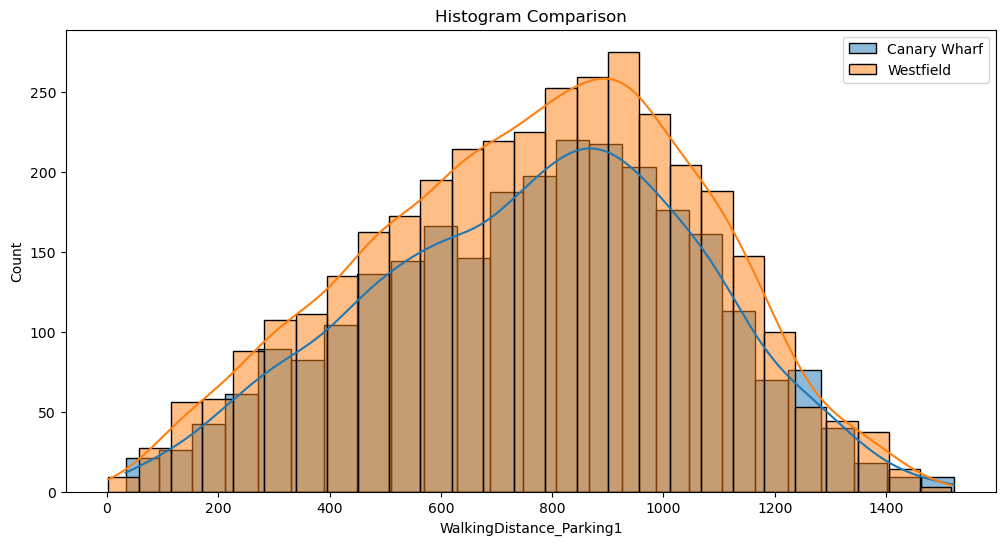

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=d2, x='WalkingDistance_Parking1', label='Canary Wharf', kde=True)
sns.histplot(data=d3, x='WalkingDistance_Parking1', label='Westfield', kde=True)
plt.legend()
plt.title('Histogram Comparison')
plt.show()

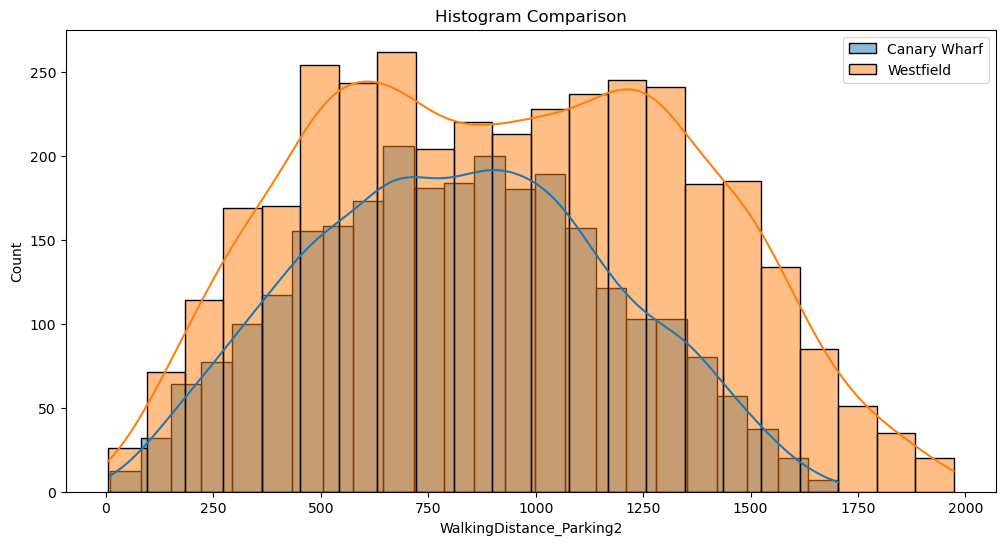

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=d2, x='WalkingDistance_Parking2', label='Canary Wharf', kde=True)
sns.histplot(data=d3, x='WalkingDistance_Parking2', label='Westfield', kde=True)
plt.legend()
plt.title('Histogram Comparison')
plt.show()

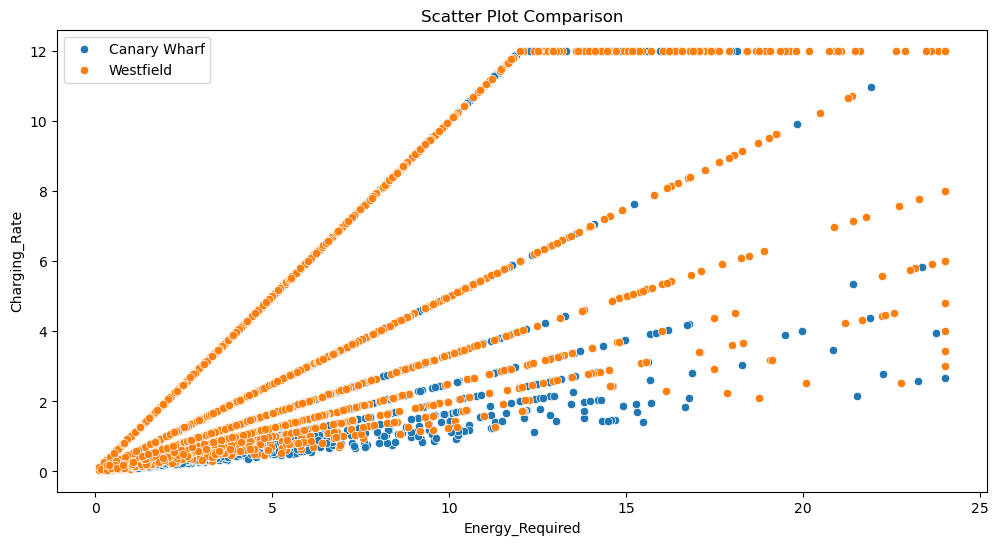

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=d2, x='Energy_Required', y='Charging_Rate', label='Canary Wharf')
sns.scatterplot(data=d3, x='Energy_Required', y='Charging_Rate', label='Westfield')
plt.legend()
plt.title('Scatter Plot Comparison')
plt.show()

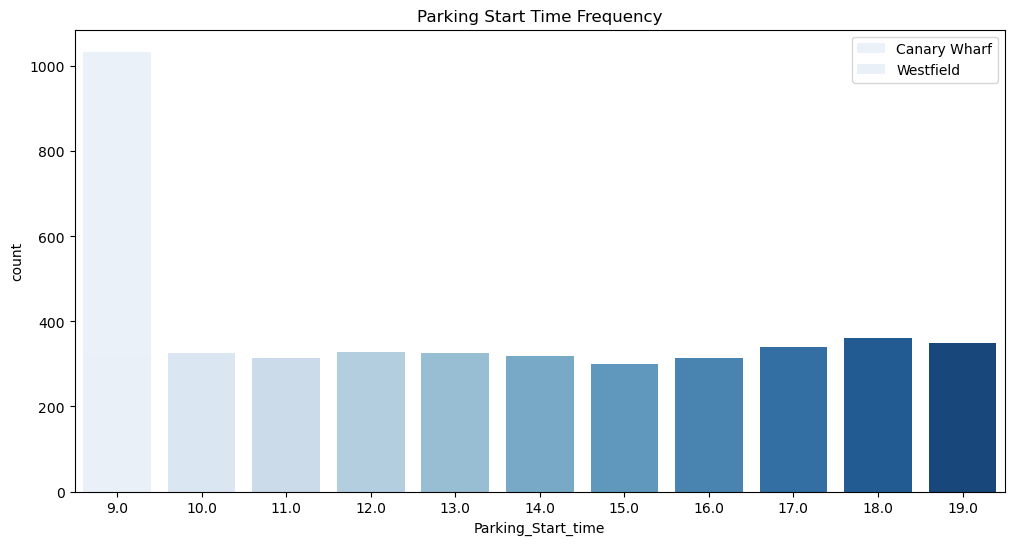

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=d2, x='Parking_Start_time', label='Canary Wharf', palette='Blues')
sns.countplot(data=d3, x='Parking_Start_time', label='Westfield', palette='Blues')
plt.legend()
plt.title("Parking Start Time Frequency")
plt.show()

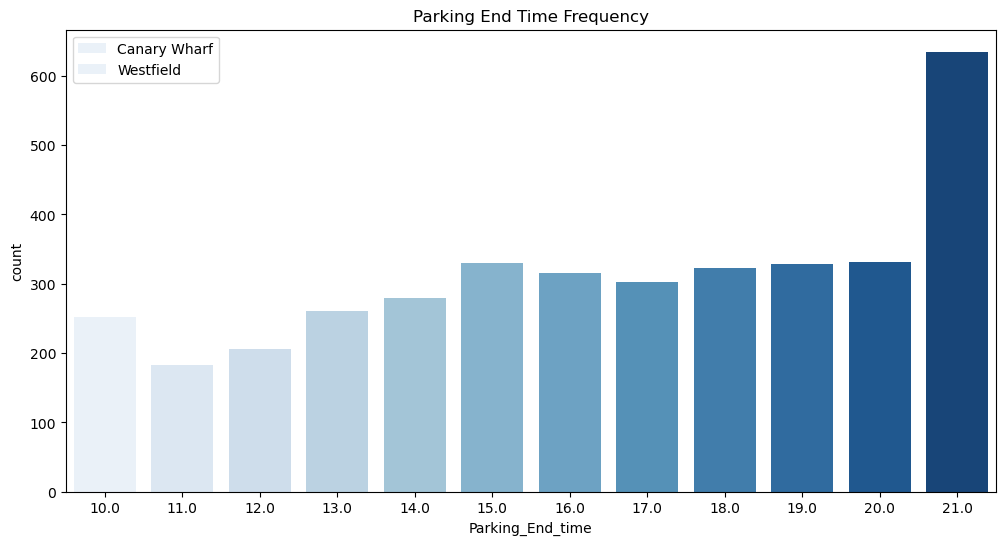

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=d2, x='Parking_End_time', label='Canary Wharf', palette='Blues')
sns.countplot(data=d3, x='Parking_End_time', label='Westfield', palette='Blues')
plt.legend()
plt.title("Parking End Time Frequency")
plt.show()

/var/folders/7n/7_lbx2395dx7n_6mp4v98l6m0000gn/T/ipykernel_1624/3914279303.py:3: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


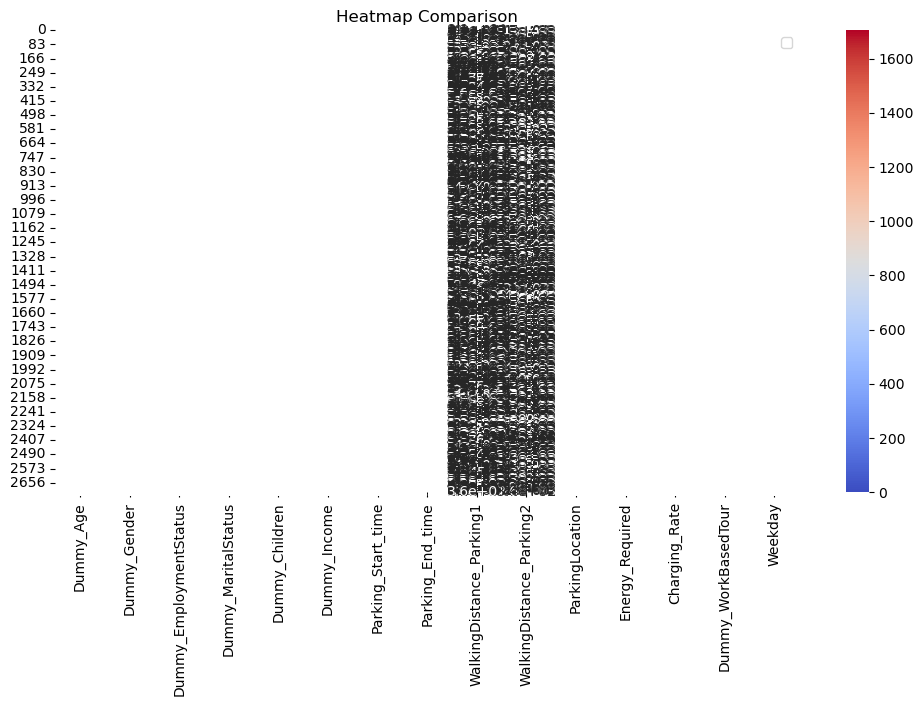

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(d2, annot=True, cmap='coolwarm', linewidths=0.5, label='Canary Wharf')
plt.legend()
plt.title('Heatmap Comparison')
plt.show()

/var/folders/7n/7_lbx2395dx7n_6mp4v98l6m0000gn/T/ipykernel_1624/2603554091.py:3: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


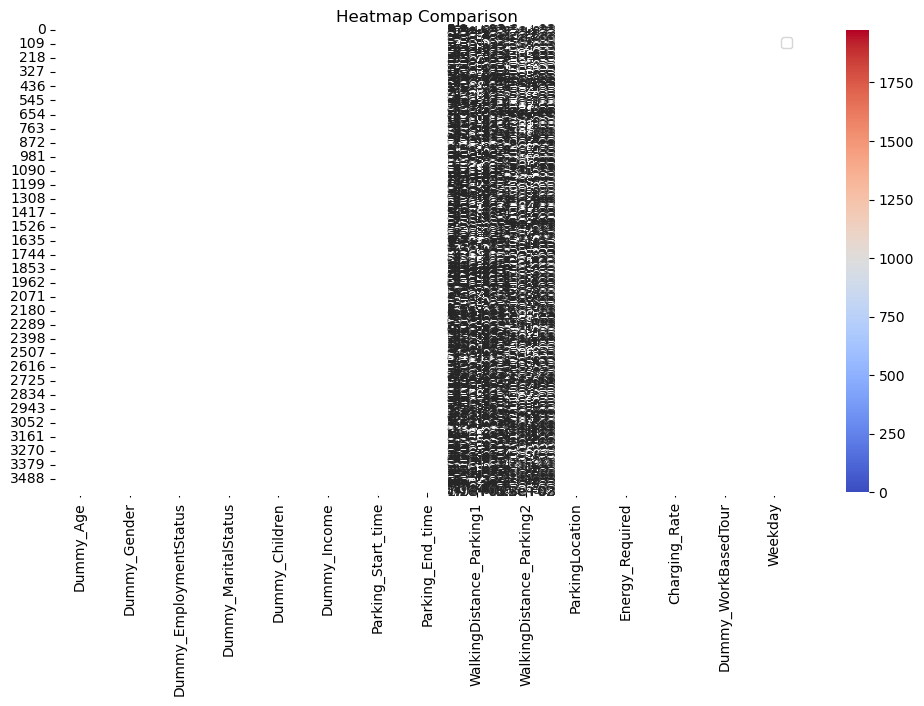

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(d3, annot=True, cmap='coolwarm', linewidths=0.5, label='Westfield')
plt.legend()
plt.title('Heatmap Comparison')
plt.show()

<Figure size 1200x600 with 0 Axes>

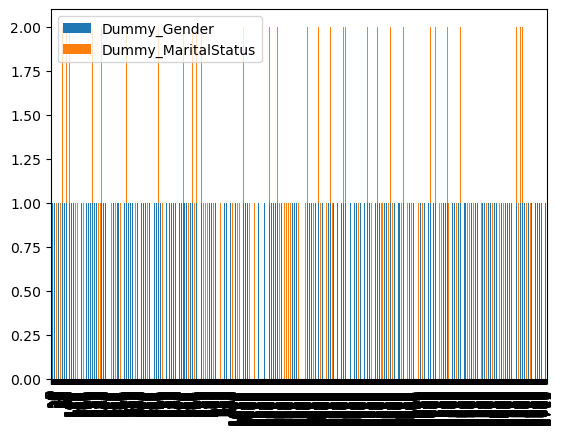

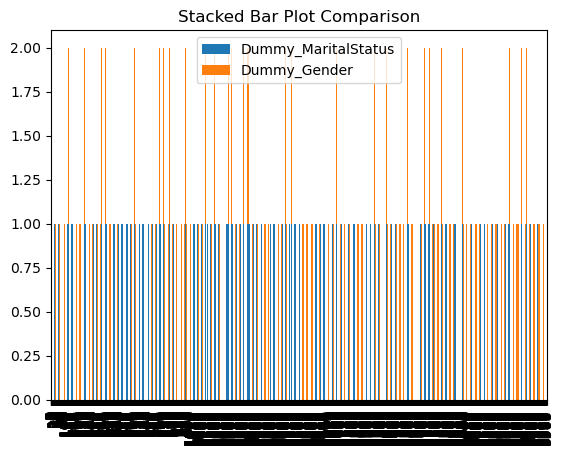

In [41]:
plt.figure(figsize=(12, 6))
d2[['Dummy_Gender', 'Dummy_MaritalStatus']].plot(kind='bar', stacked=True, label='Canary Wharf')
d3[['Dummy_MaritalStatus', 'Dummy_Gender']].plot(kind='bar', stacked=True, label='Westfield')
plt.legend()
plt.xticks(rotation=90)
plt.title('Stacked Bar Plot Comparison')
plt.show()


# Canary Wharf Linear Regression


In [42]:
categorical_cols = ['Dummy_Age','Dummy_Gender','Weekday']
encoder = OneHotEncoder(drop='first', sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(d2[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

/Users/vishal69/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
encoder_cols

,Dummy_Age_1.0,Dummy_Gender_1.0,Weekday_2.0,Weekday_3.0,Weekday_4.0,Weekday_5.0,Weekday_6.0,Weekday_7.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2709,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2710,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
numerical_cols = ['Parking_Start_time',	'Parking_End_time',	'WalkingDistance_Parking1',	'WalkingDistance_Parking2','ParkingLocation', 'Energy_Required']
scaler = StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(d2[numerical_cols]), columns=(numerical_cols))

In [45]:
scaled_cols

,Parking_Start_time,Parking_End_time,WalkingDistance_Parking1,WalkingDistance_Parking2,ParkingLocation,Energy_Required
0,-0.937012,-0.551282,0.121535,-1.414559,1.122030,4.024225
1,-0.937012,-1.094259,-1.541975,-0.123501,-0.891242,-0.935986
2,1.857884,1.349136,-0.645105,0.552543,-0.891242,1.585284
3,-0.937012,-1.365747,-1.305607,-0.440013,-0.891242,0.490898
4,-0.005380,1.349136,0.539574,1.675492,-0.891242,-0.551118
...,...,...,...,...,...,...
2708,1.236796,1.349136,-0.420767,0.845306,-0.891242,0.308110
2709,0.305164,1.349136,1.109055,-0.516441,1.122030,-0.645131
2710,-0.005380,-0.822771,0.018043,0.124910,-0.891242,-1.005857
2711,-0.937012,-1.094259,1.202129,2.151911,-0.891242,1.265838


In [46]:
X = pd.concat([encoder_cols, scaled_cols],axis=1)
Y=d2['Charging_Rate']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [48]:
model=LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [49]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)

In [50]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R2 Score', r2)

Mean Absolute Error: 1.003476740836506
Mean Squared Error: 1.8827847029584373
Root Mean Squared Error: 1.3721460210044838
R2 Score 0.676784294147015


Text(0.5, 1.0, 'Actual Charges vs Predicted Charges for EV')

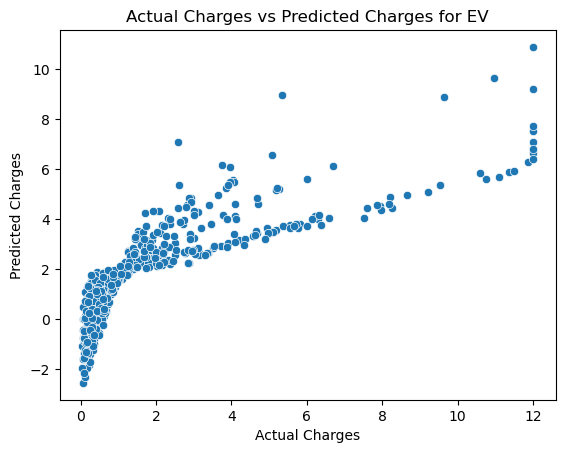

In [51]:
sns.scatterplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges for EV')

In [52]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=5)

In [53]:
ridge_model = Ridge(alpha=1.0)
ridge_scores=cross_val_score(ridge_model,X_train,Y_train,cv=5)

In [54]:
lasso_model=Lasso(alpha=1.0)
lasso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=5)

In [55]:
lr_model.fit(X_train, Y_train)
lr_prediction = lr_model.predict(X_test)
lr_mae = mean_absolute_error (Y_test, lr_prediction)
lr_mse = mean_squared_error(Y_test, lr_prediction)
lr_r2 = r2_score(Y_test, lr_prediction)

In [56]:
print('Linear MAE: ', lr_mae)
print('Linear MSE: ', lr_mse)
print('Linear R2: ', lr_r2)

Linear MAE:  1.003476740836506
Linear MSE:  1.8827847029584373
Linear R2:  0.676784294147015


In [57]:
lasso_model.fit(X_train, Y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(Y_test, lasso_prediction)
lasso_mse = mean_squared_error(Y_test, lasso_prediction)
lasso_r2= r2_score(Y_test, lasso_prediction)

In [58]:
print('Lasso MAE: ', lr_mae)
print('Lasso MSE: ', lr_mse)
print('Lasso R2: ', lr_r2)

Lasso MAE:  1.003476740836506
Lasso MSE:  1.8827847029584373
Lasso R2:  0.676784294147015


In [59]:
ridge_model.fit(X_train, Y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(Y_test, lasso_prediction)
ridge_mse = mean_squared_error(Y_test, lasso_prediction)
ridge_r2= r2_score(Y_test, lasso_prediction)

In [60]:
print('Ridge MAE: ', lr_mae)
print('Ridge MSE: ', lr_mse)
print('Ridge R2: ', lr_r2)

Ridge MAE:  1.003476740836506
Ridge MSE:  1.8827847029584373
Ridge R2:  0.676784294147015


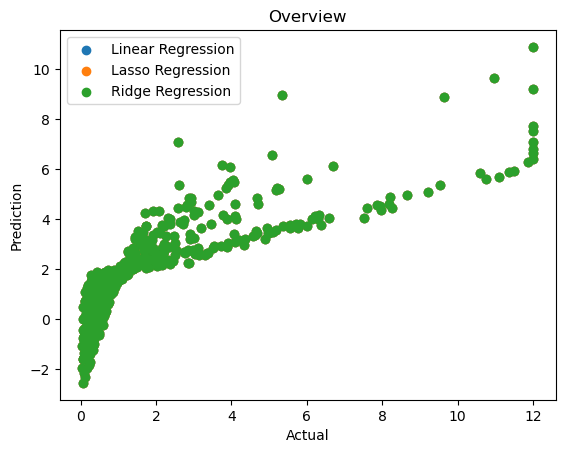

In [61]:
plt.scatter(Y_test, lr_prediction, alpha=1.0, label='Linear Regression')
plt.scatter(Y_test, lr_prediction, alpha=1.0, label='Lasso Regression')
plt.scatter(Y_test, lr_prediction, alpha=1.0, label='Ridge Regression')

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Overview')
plt.legend()

In [62]:
import statsmodels.robust.robust_linear_model as rlm
import statsmodels.api as sm

In [63]:
huber_model = HuberRegressor()
huber_model.fit(X_train, Y_train)

HuberRegressor()

In [64]:
print("Huber Regression Coefficients (scikit-learn):", huber_model.coef_)

Huber Regression Coefficients (scikit-learn): [ 0.03659027  0.01598562  0.01225274  0.00722314 -0.03325311  0.02399436
 -0.0953424   0.13897172  0.83967879 -1.01951196  0.00696441  0.01216228
 -0.00480824  1.06415959]


In [65]:
X_train_sm = sm.add_constant(X_train)  
huber_model_sm = sm.RLM(Y_train, X_train_sm, M=sm.robust.norms.HuberT())
huber_results = huber_model_sm.fit()

In [66]:
print("Huber Regression Coefficients (statsmodels):\n", huber_results.params)
print(huber_results.summary())

Huber Regression Coefficients (statsmodels):
 const                       1.502760
Dummy_Age_1.0               0.033714
Dummy_Gender_1.0            0.018266
Weekday_2.0                 0.019508
Weekday_3.0                 0.038702
Weekday_4.0                -0.017173
Weekday_5.0                 0.037763
Weekday_6.0                -0.096408
Weekday_7.0                 0.188383
Parking_Start_time          0.946595
Parking_End_time           -1.146906
WalkingDistance_Parking1    0.018471
WalkingDistance_Parking2    0.006021
ParkingLocation            -0.017187
Energy_Required             1.129968
dtype: float64
                    Robust linear Model Regression Results                    
Dep. Variable:          Charging_Rate   No. Observations:                 2170
Model:                            RLM   Df Residuals:                     2155
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                               

In [67]:
X = d2[['Energy_Required']]
y = d2['Dummy_Gender']

In [68]:
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

In [69]:
print("RANSAC Coefficients:", ransac.estimator_.coef_)
print("RANSAC Intercept:", ransac.estimator_.intercept_)

RANSAC Coefficients: [0.]
RANSAC Intercept: 1.0


In [70]:
theil_sen = TheilSenRegressor()
theil_sen.fit(X, y)

TheilSenRegressor()

In [71]:
print("Theil-Sen Coefficients:", theil_sen.coef_)
print("Theil-Sen Intercept:", theil_sen.intercept_)

Theil-Sen Coefficients: [-0.01066644]
Theil-Sen Intercept: 0.9451209358995032


In [72]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)

Lasso()

In [73]:
print("Lasso Regression Coefficients:", lasso_model.coef_)

Lasso Regression Coefficients: [ 0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.          0.          0.
  0.          0.46906404]
